# 1 ) DEFINICIÓN DEL PROYECTO DE MACHINE LEARNING

## **TÍTULO**

### **Optimización de modelos operativos en Telecom: Análisis Profundo de los contactos para Mejorar el CX**

## **TEMA**

##### **En este proyecto, llevaremos a cabo un análisis exhaustivo de las interacciones de los clientes con Telecom. Nuestro objetivo es descubrir insights a partir de un análisis profundo de los datos, correlacionando los mismo buscamos desarrollar conclusiones significativas, que no solo logren esclarecer  patrones de comportamiento de los clientes, sino que también proporcionen orientación para mejorar la experiencia del cliente de manera significativa.**

#### **El objetivo preponderante es dimensionar la demanda en volumen de llamados mediante un modelo predictivo de series temporales con una regresion lineal.

## **OBTENCIÓN DE LOS DATOS**

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

### Mi BBDD 5.000.- interacciones es obtenida desde una fuente pública:

 https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data

# 2) IMPORTACIÓN DE LIBRERIAS

In [1]:
pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.


In [2]:
# PARA EL TRATAMIENTO DE LOS DATOS Y MODELOS PREDICTIVOS
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from warnings import simplefilter
simplefilter("ignore")

## IMPORTAMOS LA FUENTE PARA LAS FIGURAS

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

## IMPORTACIÓN DEL DATASET 

In [4]:
dataset = r"C:\Users\Lucia\Desktop\PROYECTO_MLP_PABLO_XAVIER\PROYECTO_MLP_PABLO_XAVIER_MENDEZ\src\data\process\telecom.csv"
df = pd.read_csv(dataset, parse_dates=['DATE'])



In [5]:
df.head()

,CALL ID,AGENT,DATE,DAY_OF_THE_WEEK,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING
0,ID0033,Diane,2021-01-01,Friday,0 days 13:33:36,Technical Support,Y,Y,57.0,0 days 00:06:49,3.0
1,ID0056,Dan,2021-01-01,Friday,0 days 17:44:10,Streaming,Y,Y,83.0,0 days 00:06:45,4.0
2,ID0039,Stewart,2021-01-01,Friday,0 days 14:38:24,Contract related,Y,Y,74.0,0 days 00:06:41,1.0
3,ID0009,Greg,2021-01-01,Friday,0 days 11:13:55,Admin Support,Y,Y,15.0,0 days 00:06:38,4.0
4,ID0043,Diane,2021-01-01,Friday,0 days 14:47:02,Technical Support,Y,Y,45.0,0 days 00:06:21,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CALL ID                     5000 non-null   object        
 1   AGENT                       5000 non-null   object        
 2   DATE                        5000 non-null   datetime64[ns]
 3   DAY_OF_THE_WEEK             5000 non-null   object        
 4   TIME                        5000 non-null   object        
 5   TOPIC                       5000 non-null   object        
 6   ANSWERED (Y/N)              5000 non-null   object        
 7   RESOLVED                    5000 non-null   object        
 8   SPEED OF ANSWER IN SECONDS  4054 non-null   float64       
 9   AVGTALKDURATION             5000 non-null   object        
 10  SATISFACTION RATING         4054 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage

## Intento Modelo N°1

### CREACION DE UN NUEVO DATAFRAME CON EL DETALLE DE LA CANTIDAD DE LLAMADAS POR DÍA

In [7]:
calls_per_date = df.groupby("DATE").size()

calls_per_date_df = pd.DataFrame(calls_per_date, columns=["CALLS"])

calls_per_date_df

,CALLS
DATE,
2021-01-01,58
2021-01-02,60
2021-01-03,58
2021-01-04,54
2021-01-05,56
...,...
2021-03-27,58
2021-03-28,38
2021-03-29,60


### Generación del index

In [8]:
calls_per_date_df['time'] = np.arange(len(calls_per_date_df.index))

calls_per_date_df.head()

,CALLS,time
DATE,,
2021-01-01,58,0
2021-01-02,60,1
2021-01-03,58,2
2021-01-04,54,3
2021-01-05,56,4


### grafico de la cantidad de llamados diarios y la tendencia

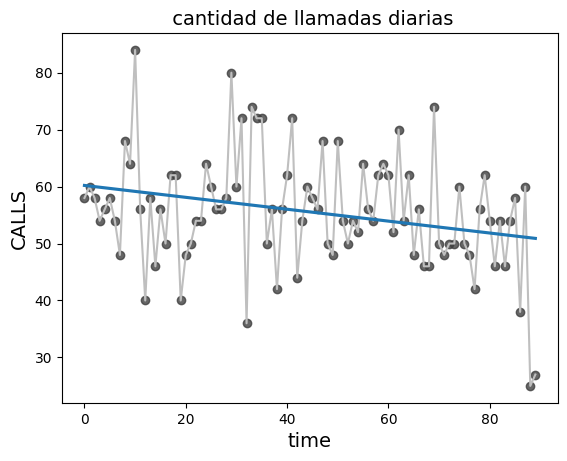

In [9]:
fig, ax = plt.subplots()
ax.plot(calls_per_date_df['time'].values, calls_per_date_df['CALLS'].values, color='0.75')
ax = sns.regplot(x='time', y='CALLS', data=calls_per_date_df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title(' cantidad de llamadas diarias');

## modelo Series temporales,  modelo de regresion lineal

In [10]:
X = calls_per_date_df.loc[:, ['time']]
y = calls_per_date_df.loc[:, 'CALLS']

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [11]:
model.coef_


array([-0.10445734])

In [12]:
model.intercept_

60.20390720390721

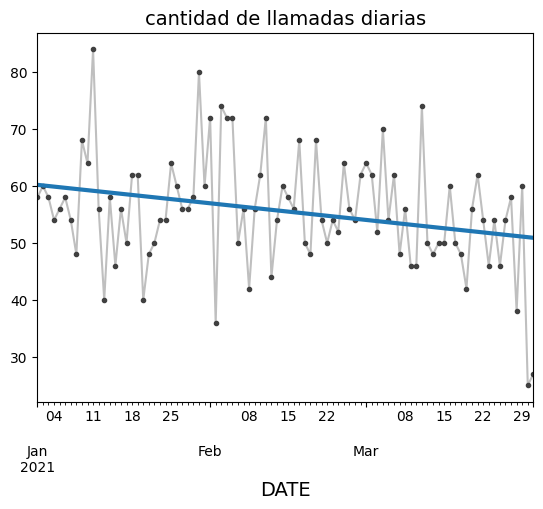

In [13]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('cantidad de llamadas diarias');

## lag feature

In [14]:
calls_per_date_df['Lag_1'] = calls_per_date_df['CALLS'].shift(1)
calls_per_date_df.head()

,CALLS,time,Lag_1
DATE,,,
2021-01-01,58,0,NaN
2021-01-02,60,1,58.0
2021-01-03,58,2,60.0
2021-01-04,54,3,58.0
2021-01-05,56,4,54.0


In [15]:

from sklearn.linear_model import LinearRegression

X = calls_per_date_df.loc[:, ['Lag_1']]

X.dropna(inplace=True) 

y = calls_per_date_df.loc[:, 'CALLS']

y, X = y.align(X, join='inner')

model = LinearRegression()

model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot llamadas por día')

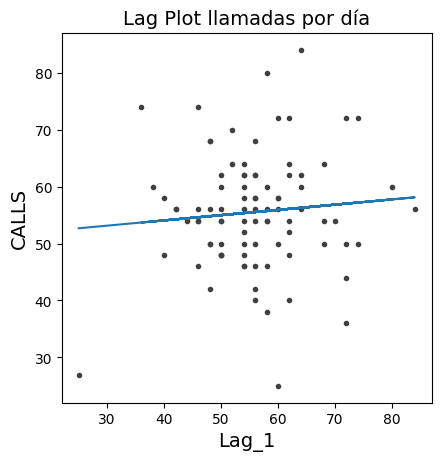

In [16]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'].values, y.values, '.', color='0.25')
ax.plot(X['Lag_1'].values, y_pred.values)
ax.set_aspect('equal')
ax.set_ylabel('CALLS')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot llamadas por día')

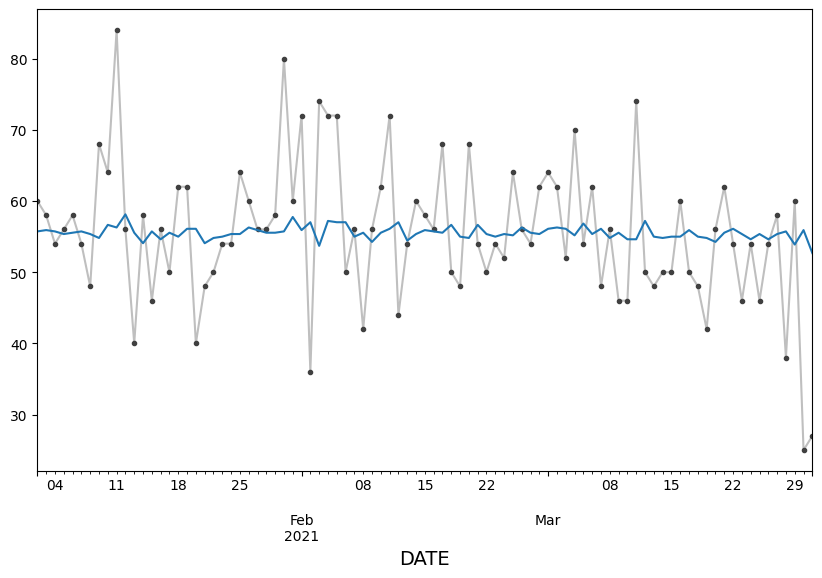

In [17]:
plt.figure(figsize=(10,6))
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [18]:
y_pred

DATE
2021-01-02    55.723751
2021-01-03    55.908025
2021-01-04    55.723751
2021-01-05    55.355204
2021-01-06    55.539478
                ...    
2021-03-27    55.355204
2021-03-28    55.723751
2021-03-29    53.881013
2021-03-30    55.908025
2021-03-31    52.683233
Length: 89, dtype: float64

___________________________

## Intento Mejora de Modelo N°2

In [19]:
dataset = r"C:\Users\Lucia\Desktop\PROYECTO_MLP_PABLO_XAVIER\PROYECTO_MLP_PABLO_XAVIER_MENDEZ\src\data\process\telecom.csv"
df = pd.read_csv(dataset, parse_dates=['DATE'])

In [20]:
import pandas as pd

calls_per_date_df = pd.DataFrame(calls_per_date, columns=["CALLS"])

calls_per_date_df.index = pd.to_datetime(calls_per_date_df.index).to_period('D')

print(calls_per_date_df)

            CALLS
DATE             
2021-01-01     58
2021-01-02     60
2021-01-03     58
2021-01-04     54
2021-01-05     56
...           ...
2021-03-27     58
2021-03-28     38
2021-03-29     60
2021-03-30     25
2021-03-31     27

[90 rows x 1 columns]


### Aplicamos un grafico de medias moviles

<Axes: title={'center': 'llamadas diarias - 90 -Day Moving Average'}, xlabel='DATE'>

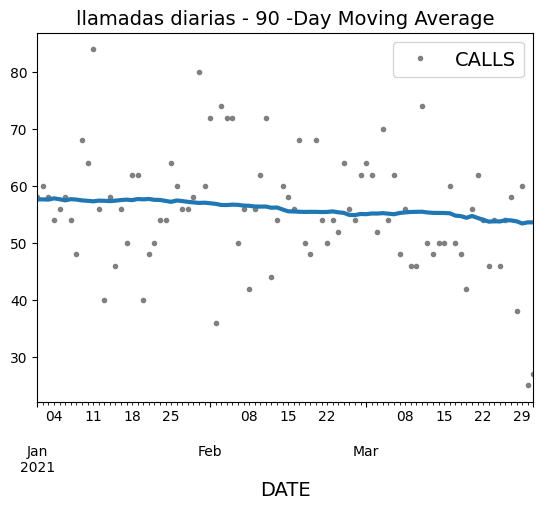

In [21]:
moving_average = calls_per_date_df.rolling(
    window=90,       
    center=True,      
    min_periods=45,  
).mean()              

ax = calls_per_date_df.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="llamadas diarias - 90 -Day Moving Average", legend=False,)

In [22]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=calls_per_date_df.index,  
    constant=True,       
    order=1,             # ingresamos la variable  (tendencia)
    drop=True,           # se elimina  
)
# creamos la características para las fechas dadas en el argumento `index
X = dp.in_sample()

X.head()

,const,trend
DATE,,
2021-01-01,1.0,1.0
2021-01-02,1.0,2.0
2021-01-03,1.0,3.0
2021-01-04,1.0,4.0
2021-01-05,1.0,5.0


In [23]:
from sklearn.linear_model import LinearRegression

y = calls_per_date_df["CALLS"]


model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

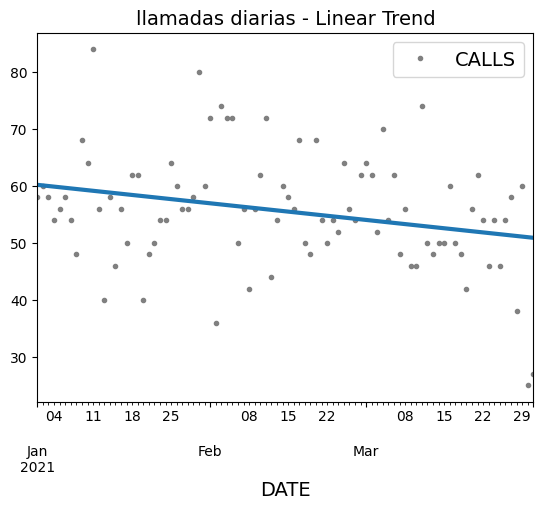

In [24]:
ax = calls_per_date_df.plot(style=".", color="0.5", title="llamadas diarias - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [25]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)

y_fore.head()

2021-04-01    50.802747
2021-04-02    50.698289
2021-04-03    50.593832
2021-04-04    50.489375
2021-04-05    50.384917
Freq: D, dtype: float64

In [26]:
calls_per_date_df

,CALLS
DATE,
2021-01-01,58
2021-01-02,60
2021-01-03,58
2021-01-04,54
2021-01-05,56
...,...
2021-03-27,58
2021-03-28,38
2021-03-29,60


### Aplicamos una parte de la serie para ver la tendencia prevista para los próximos 30 días:

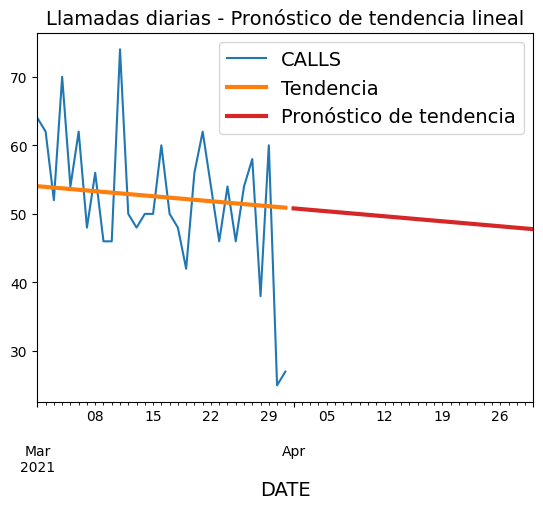

In [27]:
calls_april = calls_per_date_df["2021-03":]
y_pred_april = y_pred["2021-03":]
y_fore_april = y_fore["2021-03":]


plot_params = {
    "kind": "line",
    "title": "Llamadas diarias - Pronóstico de tendencia lineal"
}


ax = calls_april.plot(**plot_params)
ax = y_pred_april.plot(ax=ax, linewidth=3, label="Tendencia")
ax = y_fore_april.plot(ax=ax, linewidth=3, label="Pronóstico de tendencia", color="C3")


ax.legend()


plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [29]:
mse = mean_squared_error(calls_per_date_df['CALLS'], y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 94.14933774783964


In [30]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(calls_per_date_df['CALLS'], y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 7.311974500738553


In [31]:
from sklearn.metrics import r2_score

# y_true son los valores reales y y_pred son las predicciones del modelo
r2 = r2_score(calls_per_date_df['CALLS'], y_pred)

print("R cuadrado (R^2):", r2)

R cuadrado (R^2): 0.07254440717352051


In [32]:
model.coef_


array([60.30836454, -0.10445734])

In [33]:
model.intercept_

0.0

In [34]:
calls_per_date_df

,CALLS
DATE,
2021-01-01,58
2021-01-02,60
2021-01-03,58
2021-01-04,54
2021-01-05,56
...,...
2021-03-27,58
2021-03-28,38
2021-03-29,60


### guardamos el modelo en un pickle

In [35]:
import pickle

with open('modelo_regresion_lineal.pkl', 'wb') as f:
    pickle.dump(model, f)

_________________________________________________________

## Intento Mejora de Modelo N°3

## Estandarización y Escalamiento de Datos

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Estandarización
scaler = StandardScaler()
calls_per_date_df_scaled = scaler.fit_transform(calls_per_date_df[['CALLS']])
calls_per_date_df['CALLS_SCALED'] = calls_per_date_df_scaled

# Escalamiento
min_max_scaler = MinMaxScaler()
calls_per_date_df_min_max_scaled = min_max_scaler.fit_transform(calls_per_date_df[['CALLS']])
calls_per_date_df['CALLS_MIN_MAX_SCALED'] = calls_per_date_df_min_max_scaled

##  Agregar Retardos y Ventanas de Tiempo como Características
Este código añade características lag y una media móvil como ejemplos de ingeniería de características


In [37]:
# Añadimos retardos 
for lag in range(1, 4):  # Añadimo 3 retardos 
    calls_per_date_df[f'CALLS_LAG_{lag}'] = calls_per_date_df['CALLS'].shift(lag)

# Añadir una media móvil de 7 días como característica
calls_per_date_df['CALLS_MA_7'] = calls_per_date_df['CALLS'].rolling(window=7).mean()


calls_per_date_df.dropna(inplace=True)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = calls_per_date_df.drop(['CALLS', 'CALLS_SCALED', 'CALLS_MIN_MAX_SCALED'], axis=1)
y = calls_per_date_df['CALLS']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, predictions))
print("MSA",mean_absolute_error(y_test, predictions))
print("R^2:", r2_score(y_test, predictions))

MSE: 77.92204117647056
MSA 7.458235294117647
R^2: -0.021383794448475824


## Optimización de Hiperparámetros

In [39]:
from sklearn.model_selection import GridSearchCV

# Definimos el espacio HP

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

# Inicializarmos el modelo y el GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Ejecutar búsqueda
grid_search.fit(X_train, y_train)

# Mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 10, 'n_estimators': 200}


In [40]:

# Entrenamos el modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_



# Predecicion   
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R cuadrado (R^2): {r2}")

Mean Squared Error (MSE): 76.60655687882851
Mean Absolute Error (MAE): 7.335539829451593
R cuadrado (R^2): -0.004140735576081411


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(calls_per_date_df[['CALLS']])

## Creación de Secuencias
Las redes neuronales para series temporales, como LSTM, necesitan un conjunto de datos que consista en secuencias de entradas. Aquí está un ejemplo de cómo podrías crear estas secuencias:

In [42]:
import numpy as np

def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 30  
X, y = create_sequences(df_scaled, sequence_length)

In [43]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [44]:
!python -m pip install --upgrade pip

In [45]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Construcción del Modelo
Con TensorFlow y Keras, puedes construir una red neuronal para tu problema de series temporales con una LSTM:

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

## Entrenamiento del Modelo

In [47]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step - loss: 0.3065 - val_loss: 0.2006
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.2700 - val_loss: 0.1880
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2689 - val_loss: 0.1764
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2436 - val_loss: 0.1653
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2445 - val_loss: 0.1551
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2110 - val_loss: 0.1454
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2130 - val_loss: 0.1355
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1879 - val_loss: 0.1253
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1776 - val_loss: 0.1140
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1606 - val_loss: 0.1019
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1466 - val_loss: 0.0888
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1437 - val_loss: 0.0748
Epoch 13/20

In [48]:
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


## Evaluación del Modelo

In [49]:
evaluation_result = model.evaluate(X_test, y_test)

print("Tipo de resultado de evaluación:", type(evaluation_result))


print("Resultado de evaluación:", evaluation_result)


if isinstance(evaluation_result, float):
    print("Pérdida (MSE):", evaluation_result)
else:
    #
    mse_index = model.metrics_names.index('mse')  
    mae_index = model.metrics_names.index('mae')  
    mse = evaluation_result[mse_index]  
    mae = evaluation_result[mae_index]  
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R cuadrado (R^2):", r2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0624
Tipo de resultado de evaluación: <class 'float'>
Resultado de evaluación: 0.06240581348538399
Pérdida (MSE): 0.06240581348538399


In [50]:
print("MSE:", mse)
print("MAE:", mae)
print("R cuadrado (R^2):", r2)

MSE: 76.60655687882851
MAE: 7.335539829451593
R cuadrado (R^2): -0.004140735576081411


_______________________________________________________________________________________________________

## Intento Mejora de Modelo N°4

In [ ]:
dataset = r"C:\Users\Lucia\Desktop\PROYECTO_MLP_PABLO_XAVIER\PROYECTO_MLP_PABLO_XAVIER_MENDEZ\src\data\process\telecom.csv"
df = pd.read_csv(dataset, parse_dates=['DATE'])

In [ ]:
import pandas as pd

calls_per_date_df = pd.DataFrame(calls_per_date, columns=["CALLS"])

calls_per_date_df.index = pd.to_datetime(calls_per_date_df.index).to_period('D')

print(calls_per_date_df)

            CALLS
DATE             
2021-01-01     58
2021-01-02     60
2021-01-03     58
2021-01-04     54
2021-01-05     56
...           ...
2021-03-27     58
2021-03-28     38
2021-03-29     60
2021-03-30     25
2021-03-31     27

[90 rows x 1 columns]


<Axes: title={'center': 'llamadas diarias - 90 -Day Moving Average'}, xlabel='DATE'>

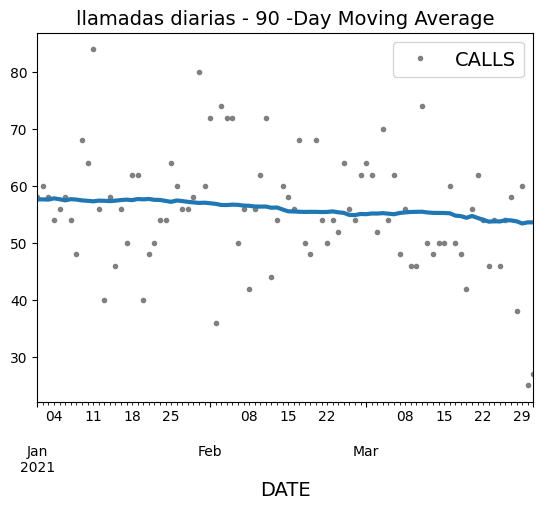

In [ ]:
moving_average = calls_per_date_df.rolling(
    window=90,       
    center=True,      
    min_periods=45,  
).mean()              

ax = calls_per_date_df.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="llamadas diarias - 90 -Day Moving Average", legend=False,)

In [ ]:
# Creación de variables
dp = DeterministicProcess(
    index=calls_per_date_df.index,
    constant=True,
    order=1,
    drop=True,
)

In [ ]:
#  train y test
train_idx, test_idx = train_test_split(calls_per_date_df.index, test_size=0.2, random_state=42)


calls_per_date_train = calls_per_date_df.loc[train_idx]
calls_per_date_test = calls_per_date_df.loc[test_idx]


NameError: name 'train_test_split' is not defined

In [ ]:
# Creamos las variables  para el sesgo y la tendencia para train y test
dp_train = DeterministicProcess(index=calls_per_date_train.index, constant=True, order=1, drop=True)
X_train = dp_train.in_sample()

dp_test = DeterministicProcess(index=calls_per_date_test.index, constant=True, order=1, drop=True)
X_test = dp_test.in_sample()

In [ ]:
# Entrenamos el modelo de regresión lineal en el conjunto de train
model = LinearRegression(fit_intercept=False)
model.fit(X_train, calls_per_date_train["CALLS"])


LinearRegression(fit_intercept=False)

In [ ]:
# Predecimos el número de llamadas en el conjunto de test
y_pred_test = pd.Series(model.predict(X_test), index=X_test.index)

In [ ]:

print("R^2:", model.score(X_test, calls_per_date_test["CALLS"]))

R^2: 0.006788818591216161


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Calcular MAE y MSE en el conjunto de test
y_true = calls_per_date_test["CALLS"]
y_pred = y_pred_test

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print("MAE:", mae)
print("MSE:", mse)

MAE: 7.45671509183632
MSE: 109.0325163590976


In [ ]:

llamadas_con_datos = calls_per_date_df[calls_per_date_df['CALLS'].notna()]

# Recalculamos calls_april usando el DataFrame filtrado
llamadas_abril = llamadas_con_datos["2021-03":]


In [ ]:

plot_params = {
    "kind": "line",
    "title": "Llamadas diarias - Pronóstico de tendencia lineal"
}


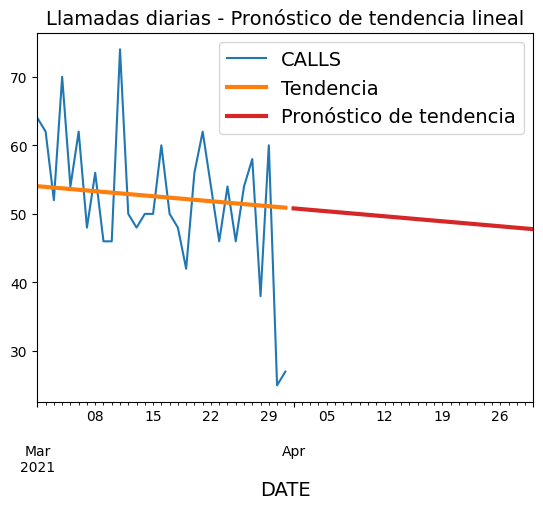

In [ ]:
# gráfico
ax = calls_april.plot(**plot_params)
ax = y_pred_april.plot(ax=ax, linewidth=3, label="Tendencia")
ax = y_fore_april.plot(ax=ax, linewidth=3, label="Pronóstico de tendencia", color="C3")


ax.legend()


plt.show()

_________________________________________________________________________________________________________

## Intento Mejora de Modelo N°5

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


dataset = r"C:\Users\Lucia\Desktop\PROYECTO_MLP_PABLO_XAVIER\PROYECTO_MLP_PABLO_XAVIER_MENDEZ\src\data\process\telecom.csv"
df = pd.read_csv(dataset, parse_dates=['DATE'])


llamadas_por_fecha = df.groupby("DATE").size()

# Convertir a DataFrame
llamadas_por_fecha_df = pd.DataFrame(llamadas_por_fecha, columns=["CALLS"])

# Agregamos índice
llamadas_por_fecha_df.index = pd.to_datetime(llamadas_por_fecha_df.index).to_period('D')

#train y test
proporcion_entrenamiento = 0.8
corte = int(len(llamadas_por_fecha_df) * proporcion_entrenamiento)
entrenamiento, prueba = llamadas_por_fecha_df.iloc[:corte], llamadas_por_fecha_df.iloc[corte:]

# Modelo SARIMAX 
modelo = SARIMAX(entrenamiento['CALLS'], 
                 order=(1, 1, 1), 
                 seasonal_order=(1, 1, 1, 2))
resultado = modelo.fit()


pronostico = resultado.forecast(steps=len(prueba))

# Cálculo de métricas
mse = mean_squared_error(prueba['CALLS'], pronostico)
mae = mean_absolute_error(prueba['CALLS'], pronostico)
r2 = r2_score(prueba['CALLS'], pronostico)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R cuadrado (R^2): {r2}")

Mean Squared Error (MSE): 159.9070618032613
Mean Absolute Error (MAE): 8.940134744245187
R cuadrado (R^2): -0.5410436652069204


__________________________________________________________________________________________________

## Intento Mejora de Modelo N°6

In [53]:
fecha_division = pd.Period("2021-01-31")  # Ajusta esta fecha a tu caso específico
datos_entrenamiento = llamadas_por_fecha_df[llamadas_por_fecha_df.index < fecha_division]
datos_prueba = llamadas_por_fecha_df[llamadas_por_fecha_df.index >= fecha_division]

# Modelo SARIMAX test 2
modelo = SARIMAX(datos_entrenamiento['CALLS'], 
                 order=(1, 1, 1), 
                 seasonal_order=(1, 1, 1, 2),
                 enforce_stationarity=False,
                 enforce_invertibility=False)

resultado = modelo.fit()

# Realizamos predicciones
predicciones = resultado.get_forecast(steps=len(datos_prueba))
predicciones_ci = predicciones.conf_int()
predicciones_mean = predicciones.predicted_mean

# metricas
mse = mean_squared_error(datos_prueba['CALLS'], predicciones_mean)
mae = mean_absolute_error(datos_prueba['CALLS'], predicciones_mean)
r2 = r2_score(datos_prueba['CALLS'], predicciones_mean)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R cuadrado (R^2): {r2}")


Mean Squared Error (MSE): 349.2437003417906
Mean Absolute Error (MAE): 15.76019517767041
R cuadrado (R^2): -2.2319424425484966


_________________________________________________________________________________________

### Conclusiones

In [ ]:
y_fore_april.sum()

1478.643453924354

In [ ]:
llamadas_por_agente = df.groupby('AGENT')['CALL ID'].count()

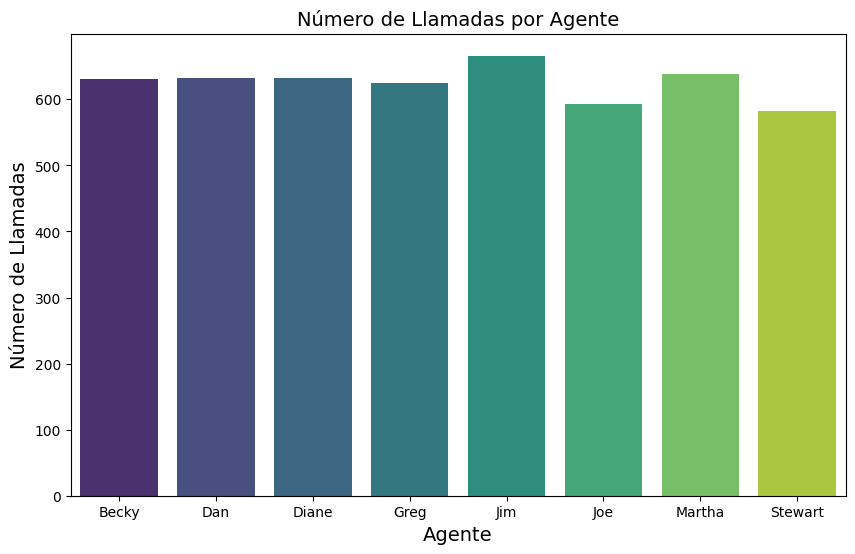

In [ ]:
llamadas_por_agente1 = pd.DataFrame(llamadas_por_agente)

plt.figure(figsize=(10, 6))
sns.barplot(x='AGENT', y='CALL ID', data=llamadas_por_agente1, palette='viridis')
plt.title('Número de Llamadas por Agente')
plt.xlabel('Agente')
plt.ylabel('Número de Llamadas')
plt.show()

In [ ]:
llamadas_por_agente


AGENT
Becky      631
Dan        633
Diane      633
Greg       624
Jim        666
Joe        593
Martha     638
Stewart    582
Name: CALL ID, dtype: int64

In [ ]:
df.DAY_OF_THE_WEEK.count()

5000

## imagen generada en el EDA

![Texto alternativo](img/llamadasporhora.png)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CALL ID                     5000 non-null   object        
 1   AGENT                       5000 non-null   object        
 2   DATE                        5000 non-null   datetime64[ns]
 3   DAY_OF_THE_WEEK             5000 non-null   object        
 4   TIME                        5000 non-null   object        
 5   TOPIC                       5000 non-null   object        
 6   ANSWERED (Y/N)              5000 non-null   object        
 7   RESOLVED                    5000 non-null   object        
 8   SPEED OF ANSWER IN SECONDS  4054 non-null   float64       
 9   AVGTALKDURATION             5000 non-null   object        
 10  SATISFACTION RATING         4054 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage

In [ ]:
#traaemos este dato realizo en el EDA a fines practicos para el analisis que vamos a realizar

In [ ]:
df_sin_duplicados = df.drop_duplicates(subset='DATE')

# Contar cuántos días únicos de la semana hay
dias_semana_unicos_count = df_sin_duplicados['DAY_OF_THE_WEEK'].value_counts()

print("Recuento de días únicos de la semana:")
print(dias_semana_unicos_count)

Recuento de días únicos de la semana:
DAY_OF_THE_WEEK
Friday       13
Saturday     13
Sunday       13
Monday       13
Tuesday      13
Wednesday    13
Thursday     12
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Suponiendo que df es tu DataFrame que contiene los datos

df['DAY_OF_THE_WEEK'] = pd.to_datetime(df['DATE']).dt.day_name()


dias_trabajados_por_agente = df.groupby(['AGENT', 'DAY_OF_THE_WEEK']).size().unstack(fill_value=0)

print("Días de la semana trabajados por cada agente:")
print(dias_trabajados_por_agente)

Días de la semana trabajados por cada agente:
DAY_OF_THE_WEEK  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
AGENT                                                                  
Becky                94     113       108      90        76       79   
Dan                  72      96       113      90        91       89   
Diane                97      87        93     100        81       93   
Greg                 79      86       103      89        89       94   
Jim                  94     111        84     102        96       80   
Joe                  81      83        73      91        88       91   
Martha               72     101       102      78       112       83   
Stewart              91      93        92      76        79       66   

DAY_OF_THE_WEEK  Wednesday  
AGENT                       
Becky                   71  
Dan                     82  
Diane                   82  
Greg                    84  
Jim                     99  
Joe                     86  
M

### se predice que para el proximo mes Abril ingresarian 1479 llamadas lo cual supera el capacity actual, dado que cada agente puede gesrionar en promedio 169 llamadas, siendo 8 agentes el capacity soportado mensualmente es de 1352 llamadas, esto sumado a que hay pico de llamados, provoca un desbordamiento de llamados y esto podria explicar en gran medida la tasa de abandono del 19%.

### Se recomienda realizar un discovery para mejorar los tiempos operativos de gestion o bien alternativas para aumentar el capacity actual por ejemplo un agente adicional o VA.




In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Crear una nueva columna 'MONTH' que contenga el mes de cada fecha
df['MONTH'] = df['DATE'].dt.month

# Filtrar las llamadas que no fueron atendidas
llamadas_no_atendidas = df[df['ANSWERED (Y/N)'] == 'N']

# Contar cuántas llamadas no atendidas hay en cada mes
llamadas_no_atendidas_por_mes = llamadas_no_atendidas.groupby('MONTH').size()

# Mostrar el resultado
print(llamadas_no_atendidas_por_mes)

MONTH
1    317
2    318
3    311
dtype: int64


### Se verifi que todos los meses no se atienden un 19 % de los lamados totales ingresados, identificamos  picos de llamados los lunes y viernes en horarios cerca del almuerzo y cercanos a las 18 horas

In [ ]:
df['TIME'] = pd.to_timedelta(df['TIME'])
df['AVGTALKDURATION'] = pd.to_timedelta(df['AVGTALKDURATION'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   CALL ID                     5000 non-null   object         
 1   AGENT                       5000 non-null   object         
 2   DATE                        5000 non-null   datetime64[ns] 
 3   DAY_OF_THE_WEEK             5000 non-null   object         
 4   TIME                        5000 non-null   timedelta64[ns]
 5   TOPIC                       5000 non-null   object         
 6   ANSWERED (Y/N)              5000 non-null   object         
 7   RESOLVED                    5000 non-null   object         
 8   SPEED OF ANSWER IN SECONDS  4054 non-null   float64        
 9   AVGTALKDURATION             5000 non-null   timedelta64[ns]
 10  SATISFACTION RATING         4054 non-null   float64        
 11  MONTH                       5000 non-null  

In [ ]:
hourly_intervals = pd.cut(df['TIME'], bins=pd.timedelta_range(start=df['TIME'].min(), end=df['TIME'].max(), freq='1H'))


llamadas_por_hora_agrupado_no_atendidas = df.groupby(hourly_intervals).size()

print(llamadas_por_hora_agrupado_no_atendidas)

TIME
(0 days 09:00:00, 0 days 10:00:00]    529
(0 days 10:00:00, 0 days 11:00:00]    529
(0 days 11:00:00, 0 days 12:00:00]    618
(0 days 12:00:00, 0 days 13:00:00]    519
(0 days 13:00:00, 0 days 14:00:00]    594
(0 days 14:00:00, 0 days 15:00:00]    513
(0 days 15:00:00, 0 days 16:00:00]    517
(0 days 16:00:00, 0 days 17:00:00]    566
(0 days 17:00:00, 0 days 18:00:00]    597
dtype: int64


In [ ]:
llamadas_por_hora = df.groupby('TIME').size()

print(llamadas_por_hora)

TIME
0 days 09:00:00    18
0 days 09:01:26    13
0 days 09:02:53    12
0 days 09:04:19    10
0 days 09:05:46    19
                   ..
0 days 17:54:14     8
0 days 17:55:41     8
0 days 17:57:07    24
0 days 17:58:34    10
0 days 18:00:00    14
Length: 375, dtype: int64


In [ ]:
llamadas_por_hora.shape

(375,)

In [ ]:


# Definir los intervalos de 1 minuto
one_minute_intervals = pd.cut(df['TIME'], bins=pd.timedelta_range(start=df['TIME'].min(), end=df['TIME'].max(), freq='1min'))

# Agrupar y contar el número de llamadas por intervalo de 10 minutos
llamadas_por_intervalo_1min = df.groupby(one_minute_intervals).size()

print(llamadas_por_intervalo_1min)

TIME
(0 days 09:00:00, 0 days 09:01:00]     0
(0 days 09:01:00, 0 days 09:02:00]    13
(0 days 09:02:00, 0 days 09:03:00]    12
(0 days 09:03:00, 0 days 09:04:00]     0
(0 days 09:04:00, 0 days 09:05:00]    10
                                      ..
(0 days 17:55:00, 0 days 17:56:00]     8
(0 days 17:56:00, 0 days 17:57:00]     0
(0 days 17:57:00, 0 days 17:58:00]    24
(0 days 17:58:00, 0 days 17:59:00]    10
(0 days 17:59:00, 0 days 18:00:00]    14
Length: 540, dtype: int64


In [ ]:
llamadas_por_intervalo_1min.shape

(540,)